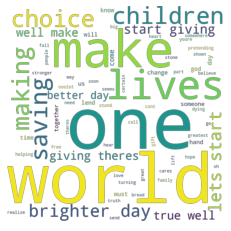

In [2]:

import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np

#  change the working directory to your path!

d = os.getcwd()

raw_text= open(path.join(d, 'we are the world.txt'), encoding = "utf8").read()
raw_text= raw_text.replace("\n"," ")

cleantextprep = str(raw_text)


# keep only letters, numbers and whitespace
expression = "[^a-zA-Z0-9 ]" 
cleantextCAP = re.sub(expression, '', cleantextprep) # apply regex
cleantext = cleantextCAP.lower() # lower case 



text_file = open("Output_total.txt", "w")
text_file.write(str(cleantext))
text_file.close()


root_path = os.getcwd()

# Read the whole text.
with open(path.join(root_path, 'Output_total.txt'), 'r', encoding='utf-8', errors='ignore') as outout_file:
    text = outout_file.readlines()

# Mask
pic = np.array(Image.open(path.join(root_path, "earth.jpg")))


# Optional additional stopwords
stopwords = set(STOPWORDS)
stopwords.add("song")

# Construct Word Cloud
# no backgroundcolor and mode = 'RGBA' create transparency
wc = WordCloud(max_words=100, mask=pic,
               stopwords=stopwords, mode='RGBA', background_color=None)


# Pass Text
wc.generate(text[0])

# store to file
wc.to_file(path.join(root_path, "we are the world.png"))



plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
